# CSCI 3352 Biological Networks, Spring 2020, Prof. Clauset
Submit here: https://moodle.cs.colorado.edu/course/view.php?id=1273

# Problem Set 2 : Network representations and statistics

***

**Name**: Denver Chernin <br>
**Disucssed with:** Julia Sanford

***

This assignment is due on Moodle by **11:55pm on Thursday, January 30th**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 100 points total, and 17 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Moodle.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [3]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Counting motifs (55 pts total)

Motifs are small subgraphs, often of 3 or 4 nodes, and their relative abundance can provide evidence for or against different underlying network assembly processes. Analyzing this kind of information depends on being able to count the number of occurrences of target motifs in a given network. In this problem, we'll develop such a counting algorithm.

***
### Problem 1-A (30 pts)

In directed networks, the two most commonly studied motifs are
* feed-forward loop ("FFL")
* cycle (sometimes called a feedback loop, or "FBL")

For instance, below is a simple directed graph (a "digraph") that contains one of each: the FFL is among nodes $\{1,2,3\}$ and the FBL is among nodes $\{4,5,6\}$.

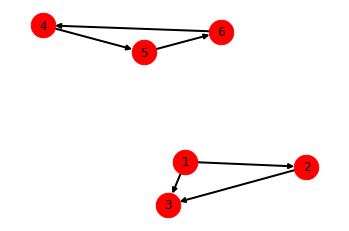

In [5]:
G = nx.DiGraph([(1,2), (2,3), (1,3), (4,5), (5,6), (6,4)])                            # make a directed network
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

* Write a function `count_FFBL_motifs()` that takes as input a directed graph `G` and a binary value `flag` and
  1. if `flag==1`, prints a statement of the form `FFL: (i,j),(j,k),(i,k)` or `FBL: (i,j),(j,k),(k,i)` for each FFL or unique FBL it finds, and
  * returns the counts the number of FFL motifs and the number of FBL motifs that `G` contains. <br/>
  
* Apply your function to the network `G` defined below, with `flag=1`, and report the FFL and FBL motif counts.
* Briefly explain how your algorithm for `count_FFBL_motifs()` works. (Note that the network is small enough that you can calculate the result by hand and use that information to debug your algorithm.)

Hint: Use a graph traversal approach to enumerate all paths of length two, e.g. $\sigma_{ijk} = \{(i\rightarrow j), (j \rightarrow k)\}$, where $i\not=k$, and for each, query the network for the existence of the third edge of the motif, either $(i,k)$ or $(k,i)$ depending on which motif is being counted. Within the DiGraph structure of `networkx`, the `neighbors` and `has_edge` functions will be useful.

*Warning*: remember that a single unique FBL motif can be counted 3 times, once for a 3-cycle starting at each of $i$, $j$, and $k$.

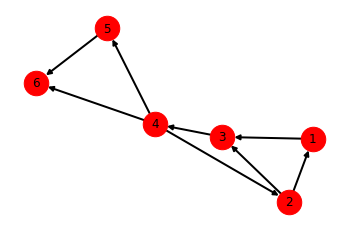

In [6]:
G = nx.DiGraph([(1,3),(2,1),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)])
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

In [7]:
def count_FFBL_motifs(G,flag):
    # input : a networkx digraph G and a binary-valued variabe flag
    # output: if flag=1, a print statement of the type {FFL,FBL} and its member edges for each found motif
    #         a list (FFL,FBL) of the counts of feed-forward and feed-back loops in G
    
    #Two counts for each type of motif
    FFL_count = 0
    FBL_count = 0
    
    #Dictionary that will be {node: [neighbors]} (aka a form of adjacency list in order to traverse grapg)
    adj_list = {}
    
    #List for each type of loop
    #This is used to make sure that i,j,k does not get counted as j,i,k or any other ordering
    #Ensures motifs are counted once
    FBL_lst = []
    
    #These two for loops create my adjacency list
    #It starts by initalizing my adjacecny list with every node and a blank list for their neighbors
    #It then goes through each node and its neighbors and appends onto the list for that node
    for n in G.nodes():
        adj_list[n] = []
    for node in G.nodes():
        for edge in list(G.neighbors(node)):
            adj_list[node].append(edge)
    
    #Once the adjacency list is formed I step through each node and assign that to a 'i' and 
    #then go through each of i's neighbors which are noted as 'j' and then to j's neighbors (k)
    #Once I have a path from i --> j --> k where k != i I check where i has an edge to k or 
    #k has an edge to i and classify that motif
    #Only prints (i,j,k) for the motifs if flag = 1
    for i in adj_list.keys():
        for j in adj_list[i]:
            for k in adj_list[j]:
                if(k != i):
                    if(G.has_edge(i, k)):
                        if(flag):
                            print("FFL: ("+str(i)+","+str(j)+")("+str(j)+","+str(k)+")("+str(i)+","+str(k)+")" )
                        FFL_count += 1
                    if(G.has_edge(k, i)):
                        if(sorted([i,j,k]) not in FBL_lst):
                            if(flag):
                                print("FBL: ("+str(i)+","+str(j)+")("+str(j)+","+str(k)+")("+str(k)+","+str(i)+")" )
                            FBL_lst.append(sorted([i,j,k]))
                            FBL_count += 1
    
    return (FFL_count,FBL_count)

In [8]:
##### do not modify below here #####
counts = count_FFBL_motifs(G,1)

print(f'FFL count = {counts[0]}')
print(f'FBL count = {counts[1]}')

FBL: (3,4)(4,2)(2,3)
FFL: (2,1)(1,3)(2,3)
FFL: (4,5)(5,6)(4,6)
FFL count = 2
FBL count = 1


The approach I took for this algorithm came from the lecture 2 notes on page 13. My algorithm uses path enumeration where I look at all length-2 paths starting from every node and see if they connect back. If it does connect back I classify it based on the edge (i,k) or (k,i). Using an adjacency list created as a python dictionary, I stepped through each node as i, and then their 2 neighbors as j and k. Once I had a length-2 path from i to k I need to check whether an edge (i,k) or (k,i) existed using the 'in' built-in function for lists. I I then sorted the edges of each motif in order to make a motif such as (3,4,2) = (4,2,3). If it does exist I added it to the correct motif type list. Checking the flag to determine if it needs to be printed. 

### Problem 1-B (15 pts)
Before applying your motif counting function from `Problem 1-A` to some real data, follow the standard 'good practice' when importing a new network data set by computing and examining its summary statistics, which provides context for interpreting the output from counting motifs.

For the `metabolism_afulgidus` directed network, compute and report
* the number of nodes $n$ and directed edges $m$
* the mean in-degree $\langle k_{\rm in} \rangle$ and mean out-degree $\langle k_{\rm out} \rangle$
* a CCDF plot showing the in- and out-degree distribution $\Pr(K \geq k_{\rm in})$ and $\Pr(K \geq k_{\rm out})$ together (use the provided `plot_2CCDF()` function).
* the smallest number of nodes that together account for just over 50% of the out-degree 'wealth' in the network

Comment briefly on
* the applicability of the formula $\langle k \rangle = 2m/n$
* why the values for $\langle k_{\rm in} \rangle$ and $\langle k_{\rm out} \rangle$ turn out the way they do, and on their relationship to $2m/n$.
* what, if anything, the shape of the in- and out-degree CCDFs indicate about the degree distributions of this network, and what that implies about metabolism.

(*2 pts extra credit*) Include a ridiculogram visualization of the network.

In [9]:
def plot_2CCDF(kins,kouts):
    # input : two lists of in- and out-degrees
    # output: a plot showing CCDFs of the in- and out-degree distributions Pr(K>=k) for k>=1
    
    kin_max  = max(kins)
    kout_max = max(kouts)

    # histograms
    icounts, ibins = np.histogram(kins, bins=[i for i in range(kin_max+2)], density=True)
    icumcounts = np.cumsum(icounts)
    icumcounts = np.insert(icumcounts,0,0)
    ocounts, obins = np.histogram(kouts, bins=[i for i in range(kout_max+2)], density=True)
    ocumcounts = np.cumsum(ocounts)
    ocumcounts = np.insert(ocumcounts,0,0)

    # plots
    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.loglog(obins[1:-1], 1-ocumcounts[1:-1], 'bo', alpha=0.5, label='out-degree')
    plt.loglog(ibins[1:-1], 1-icumcounts[1:-1], 'rs', alpha=0.5, label='in-degree')
    plt.title('CCDF, in- and out-degrees (loglog)')
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.legend(loc='upper right');
    plt.show()
    return

reading the network file : metabolism_afulgidus.gml

number of nodes, n  = 315
number of edges, m  = 5434

mean(k_in)  = 17.25
mean(k_out) = 17.25

smallest num for 50%  = 31 of 315 nodes


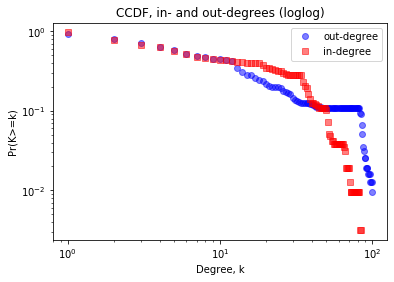

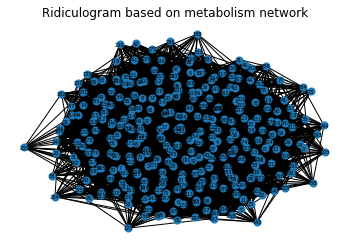

This is the ridiculogram for the metabolism_afulgidus network as it was created with 315 nodes, matching the network, and p was calculated to preserve the average degree. It was calculated using the p = c/(n-1) equation discussed in class. As you can see it is extremely ridiculous as no understanding can come out of this represenation.


In [11]:
# this data set is from Gorochowski et al., Science Advances 4(3), eaap9751 (2018) 
# https://advances.sciencemag.org/content/4/3/eaap9751
fname = 'metabolism_afulgidus.gml'
print(f'reading the network file : {fname}\n')
##### do not modify above here #####

#Generates our metabolism graph
meta = nx.Graph()
meta = nx.read_gml(fname, label = 'id')

#List returns all nodes and all edges so taking the length will give us
#the number of nodes and the number of edges (instead of each explicit edge)
n = len(nx.nodes(meta))
m = len(nx.edges(meta))

#Calculating the average in degree by iterating over every node 
#and adding its in degree to a list, summing the list and dividing by the number of nodes
kin_mean = 0
in_deg = []
for x in meta.in_degree():
    in_deg.append(x[1])
kin_mean = sum(in_deg)/n


#Same thing as in degree calculationg, but applied to the out degrees
kout_mean = 0 
out_deg = []
for x in meta.out_degree():
    out_deg.append(x[1])
kout_mean = sum(out_deg)/n


#This calculates the number of nodes that make up 50% of out degrees
#First need to calculate what 50% of out-degree is and then sort our list of degrees
#because we want to look at the largest out-degree nodes first
#I then iterate through the sorted degree list backwards as to look
#at the largest out-degree nodes first, once at least 50% is met we stop 
#adding up nodes
fifty_percent = (sum(out_deg)) * 0.5
sort_out_deg = sorted(out_deg)
ind = 0
summ = 0
for i in range(len(sort_out_deg) - 1, 0 , -1):
    if(summ < fifty_percent):
        summ += sort_out_deg[i]
        ind += 1        
        
kins = in_deg
kouts = out_deg
##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'\nmean(k_in)  = %5.2f' % kin_mean)
print(f'mean(k_out) = %5.2f' % kout_mean)
print(f'\nsmallest num for 50%  = {ind} of {n} nodes')
plot_2CCDF(kins,kouts)

#Our network has 315 nodes (n), setting p = c/(n-1) = 34.5/314
#Using the networkx random ER graph function supplying relevant n and p values
ridiculogram = nx.erdos_renyi_graph(315, 0.109)
plt.title("Ridiculogram based on metabolism network")
limits = plt.axis("off")
plt.show(nx.draw_networkx(ridiculogram, node_size = 50, font_size = 5))
print("This is the ridiculogram for the metabolism_afulgidus network as it was created with 315 nodes, matching the network, and p was calculated to preserve the average degree. It was calculated using the p = c/(n-1) equation discussed in class. As you can see it is extremely ridiculous as no understanding can come out of this represenation.")

* **The applicability of the formula** $\langle k \rangle = 2m/n$<br><br>
    The formula $\langle k \rangle = 2m/n$ calculates the average degree over all nodes in the graph. The numerator, m (edges), is multiplied by two because in undirected graphs edges can be traversed in both directions. This is not completely applicable to this network as our edges are directed. <br><br>
*  **Why the values for $\langle k_{\rm in} \rangle$ and $\langle k_{\rm out} \rangle$ turn out the way they do, and on their relationship to $2m/n$. <br> <br>**
    If the $\langle k \rangle$ = 2m/n then on average a node has 2m/n degrees and since the $\langle k_{\rm in}\rangle = \langle k_{\rm out} \rangle = 1/2\langle k \rangle$ each node's 2m/n degrees are made up of 50% $degree_{\rm in}$ and 50% by $degree_{\rm out}$ <br>
    <br>
* **What, if anything, the shape of the in- and out-degree CCDFs indicate about the degree distributions of this network, and what that implies about metabolism.<br><br>**
    The degree distrubtion for in-degrees and out-degrees follow very similar curves showing that nodes with some amount of in-degrees will tend to have a similar number of out-degrees. Metabolism "nodes" will receive a certain amount of information and output the same amount of information. This shows that the metabolism is very connected and information flowing through is important.
<br><br>

### Problem 1-C (10 pts)
* Apply your motif counting function `count_FFBL_motifs()` from `Problem 1-A` to the `metabolism_afulgidus` directed network, with `flag=0`, to count its FFL and FBL motifs.
* Report the number of each that you find, and comment briefly on (1) their relative abundance, and (2) what you think this might mean for how 'information' might flow across this network.

In [12]:
# Your code here
counts = count_FFBL_motifs(meta, 0)
##### do not modify below here #####
print(f'FFL count = {counts[0]}')
print(f'FBL count = {counts[1]}')

FFL count = 133378
FBL count = 24171


In the metabolism_afulgidus network there are 133,378 feed forward loops and only 24171 feedback loops leading us to believe that this networks intention is to pass information forward through the network while some loops regulate themselves.

***
***
## Problem 2 : Graph representations (12 pts total)

Consider the following networks.

Network 1:
![alt text](http://santafe.edu/~aaronc/courses/3352/network_represent_1.png "Network 1")

Network 2:
![alt text](http://santafe.edu/~aaronc/courses/3352/network_represent_2.png "Network 2")

***
### Problem 2-A (3 pts)

For Network 1, give the adjacency matrix representation. Let $(i\to j) \implies A_{ij}=1$.

\begin{bmatrix}
  & 1 & 2 & 3 & 4 & 5\\
1 & 0 & 1 & 0 & 0 & 1\\
2 & 0 & 0 & 1 & 0 & 0\\
3 & 1 & 0 & 0 & 0 & 0\\
4 & 1 & 0 & 0 & 0 & 1\\
5 & 0 & 0 & 1 & 1 & 0\\
\end{bmatrix}

***
### Problem 2-B (3 pts)

For Network 1, give the adjacency list representation.

[1] $\rightarrow$ (2,5)<br>
[2] $\rightarrow$ (3)<br>
[3] $\rightarrow$ (1)<br>
[4] $\rightarrow$ (1,5)<br>
[5] $\rightarrow$ (3,4)<br>

***
### Problem 2-B (6 pts)

For Network 2, give the adjacency matrix representation of both one-mode projections.

Top of bipartite graph (5 nodes)
\begin{bmatrix}
  & 1 & 2 & 3 & 4 & 5\\
1 & 0 & 0 & 1 & 1 & 1\\
2 & 0 & 0 & 0 & 1 & 1\\
3 & 1 & 0 & 0 & 0 & 0\\
4 & 1 & 1 & 0 & 0 & 0\\
5 & 1 & 1 & 0 & 0 & 0\\
\end{bmatrix}
<br>
<br>
Bottom of bipartite graph (6 nodes)
\begin{bmatrix}
  & 1 & 2 & 3 & 4 & 5 & 6\\
1 & 0 & 1 & 1 & 0 & 1 & 0\\
2 & 1 & 0 & 1 & 0 & 0 & 1\\
3 & 1 & 1 & 0 & 1 & 1 & 0\\
4 & 0 & 0 & 1 & 0 & 0 & 0\\
5 & 1 & 0 & 1 & 0 & 0 & 0\\
6 & 0 & 1 & 0 & 0 & 0 & 0\\
\end{bmatrix}

***
***

## Problem 3 : Calculations by hand (13 pts total)

For each of the following networks, calculate the requested information by hand.

Do not use software to do these calculations. Write up your answer in Markdown in the corresponding box below.

***
### Problem 3-A (6 pts)

* Enumerate and count the number of 2-cycle motifs <br/> write each in the form $(a\to b\to a)$
* Enumerate and count the number of FFL and unique FBL motifs <br/> for each FFL, note which node is "feeding forward" a signal
* Enumerate and count the number of _walks_ of length 3 <br/> write each in the form $(a\to b\to c \to d)$

Hint: A _walk_ and a _path_ are slightly different. In the former, nodes can be repeated, while in the latter, they cannot.

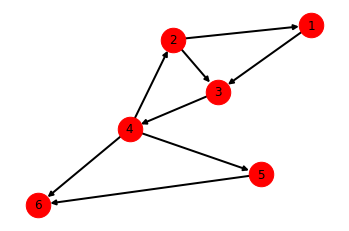

In [14]:
G = nx.DiGraph([(1,3),(2,1),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)])                     # make a directed network
nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

**2-cycle motifs (0):** <br>
None as there are no edges that go both directions between two nodes. Once a directed edge from any node is traversed it becomes impossible to get back to the original node traversing only 1-more edge. 
<br> <br>
**FFL motifs (2):** <br>
(4 $\rightarrow$ 5 $\rightarrow$ 6) where 5 is the feeding forward node<br>
(2 $\rightarrow$ 1 $\rightarrow$ 3) where 1 is the feeding forward node<br> 
<br> 
**FFB motifs (1):**<br>
(3 $\rightarrow$ 4 $\rightarrow$ 2)<br>
<br>
**Length 3 walks (12):**<br>
1 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 5 <br>
1 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 2 <br>
1 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 6 <br>
<br>
2 $\rightarrow$ 1 $\rightarrow$ 3 $\rightarrow$ 4 <br>
2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 5 <br>
2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 6 <br>
2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 2 <br>
<br>
3 $\rightarrow$ 4 $\rightarrow$ 2 $\rightarrow$ 1 <br>
3 $\rightarrow$ 4 $\rightarrow$ 2 $\rightarrow$ 3 <br>
3 $\rightarrow$ 4 $\rightarrow$ 5 $\rightarrow$ 6 <br>
<br>
4 $\rightarrow$ 2 $\rightarrow$ 1 $\rightarrow$ 3 <br>
4 $\rightarrow$ 2 $\rightarrow$ 3 $\rightarrow$ 4 <br>
<br>
**Total number of walks:** 12


***
### Problem 3-B (7 pts)

Let $G$ be the [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph), with $n=10$ nodes and $m=15$ edges. For $\ell\in\{2,3,4,5\}$, count the number of $\ell$-cycles in $G$. For convenience, label the outer nodes $(1,2,3,4,5)$ starting at 12 o'clock and running clockwise, and label the inner nodes $(6,7,8,9,10)$ in the same fashion.

Hint: a *cycle* is a path (no edges repeated) that begins and ends at the same node.

E $\in$ {(1,2), (2,3), (3,4), (4,5), (5, 1), (1,6), (2, 7), (3, 8), (4, 9), (5, 10), (6,8), (6,9), (7,10), (7,9), (8,10)}<br>
<br>
**2-cycles:**<br>
It is not possible to make a 2-cycle in this graph with the set of edges from above<br>
**3-cycles:**<br>
It is not possible to make a 3-cycle in this graph with the set of edges from above<br>
**4-cycles:**<br>
It is not possible to make a 4-cycle in this graph with the set of edges from above<br>
**5-cycles:**<br>
1 $\rightarrow$ 2 $\rightarrow$ 3 $\rightarrow$ 4 $\rightarrow$ 5  $\rightarrow$ 1<br>
1 $\rightarrow$ 2 $\rightarrow$ 7 $\rightarrow$ 10 $\rightarrow$ 5 $\rightarrow$ 1<br>
1 $\rightarrow$ 2 $\rightarrow$ 7 $\rightarrow$ 9 $\rightarrow$ 6 $\rightarrow$ 1<br>
1 $\rightarrow$ 2 $\rightarrow$ 3 $\rightarrow$ 8 $\rightarrow$ 6 $\rightarrow$ 1<br>
1 $\rightarrow$ 5 $\rightarrow$ 10 $\rightarrow$ 8 $\rightarrow$ 6 $\rightarrow$ 1<br>
1 $\rightarrow$ 5 $\rightarrow$ 4 $\rightarrow$ 9 $\rightarrow$ 6 $\rightarrow$ 1<br>
<br>
2 $\rightarrow$ 7 $\rightarrow$ 9 $\rightarrow$ 4 $\rightarrow$ 3 $\rightarrow$ 2<br>
2 $\rightarrow$ 7 $\rightarrow$ 10 $\rightarrow$ 8 $\rightarrow$ 3 $\rightarrow$ 2<br>
<br>
3 $\rightarrow$ 8 $\rightarrow$ 10 $\rightarrow$ 5 $\rightarrow$ 4 $\rightarrow$ 3<br>
3 $\rightarrow$ 4 $\rightarrow$ 9 $\rightarrow$ 6 $\rightarrow$ 8 $\rightarrow$ 3<br>
<br>
4 $\rightarrow$ 5 $\rightarrow$ 10 $\rightarrow$ 7 $\rightarrow$ 9 $\rightarrow$ 4<br>
<br>
6 $\rightarrow$ 9 $\rightarrow$ 7 $\rightarrow$ 10 $\rightarrow$ 8 $\rightarrow$ 6<br>
<br>
**Total 5-Cycles: 12**
<br>
 

 

***
### Problem 3-C (*5 pts extra credit*)

Let $G$ be a network with $n$ nodes and $m=3n$ directed edges. For each of the following representations, first derive as a function of $n$ the number of *bits* required to store $G$; then, let $n=100,000$ and give the number of gigabytes necessary to store $G$. Comment on whether this is feasible. You may ignore the cost of storing any pointers.
* an adjacency matrix
* an adjacency list

Hint: It takes $\log_2 k$ bits to uniquely represent an integer of value $k$.

Your answer here

***
***

## Problem 4 : Node degree and local structure (20 pts)

The degree structure of a network is the "first-order" description of its organization, and is usually the first thing we analyze when examining any real-world network. That is, we ask the question: *how much of a network's structure is potentially driven by variation in node degrees?*

Typically, node degree correlates with many other node-level statistics, in part because higher degree nodes just have more edges attached to them, which allows them to attached to a wider variety of other nodes and structures.

In this question, you will investigate this correlation between node-level summary statistics in an open-ended fashion, focusing on how the in- and out-degrees correlate with each other and with other node-level measures. Remember that in a directed network, there are two kinds of degrees: the in-degree $k_{\rm in}$ and the out-degree $k_{\rm out}$.

* Using `networkx` functions as needed, compute the following node-level summary statistics for each node $v$ on the network from `Problem 1-B`:
  * the number of other nodes *reachable* from a node $v$ (e.g., using `single_source_shortest_path_length()`)
  * the *eccentricity* of a node $v$, defined as the maximum length geodesic from $v$
  * the *reciprocity* of a node $v$, defined as the fraction of out-edges $(v,u)$ that are reciprocated $(u,v)$
* Begin by making a scatter plot showing how in-degree $k_{i}^{\rm in}$ varies as a function of out-degree $k_{i}^{\rm out}$.
* Then make a series of additional scatter plots showing each of the three other node-level statistics covaries with in-degree and out-degree. Don't forget to label your axes (see syllabus...).
* Conclude with a brief discussion of what correlations you do and don't see, what patterns you see and what qualitative structures would give rise to them, and offer a brief explanation of your findings.

Hint 1: To explain why you think it appears, think carefully about the role that having more or fewer edges attached to some node $v$ has on the number and length of geodesic paths that originate at it.

Hint 2: For ease of comparison, plot both the in-degree and out-degree scatter on the same axes (but use different colors so you can tell them apart).

reading the network file : metabolism_afulgidus.gml



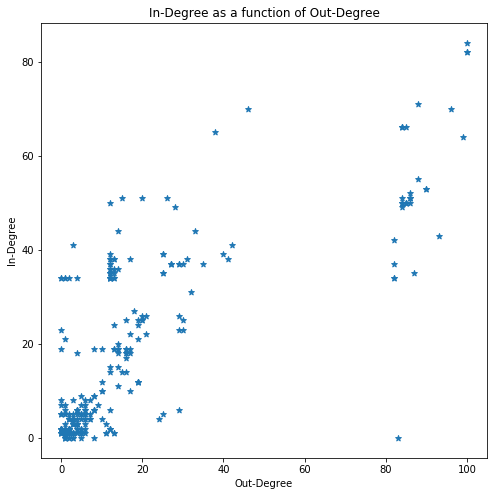

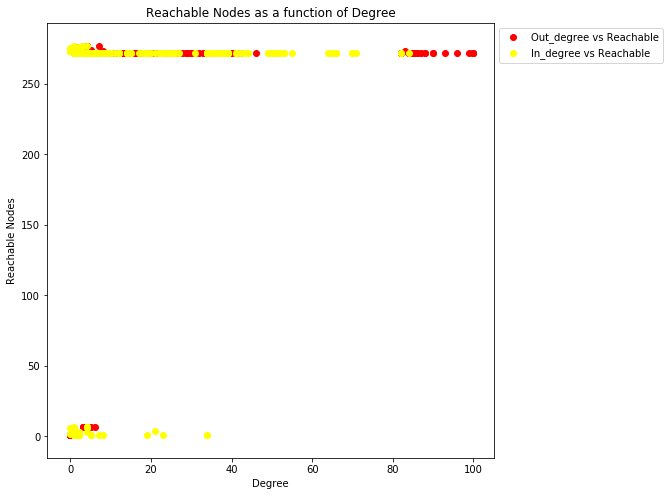

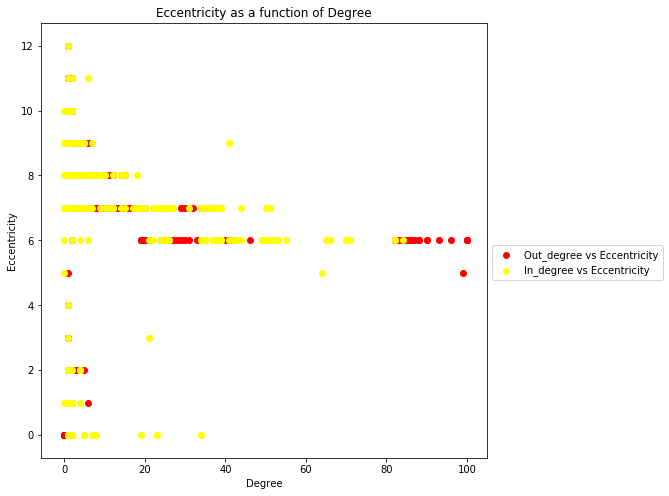

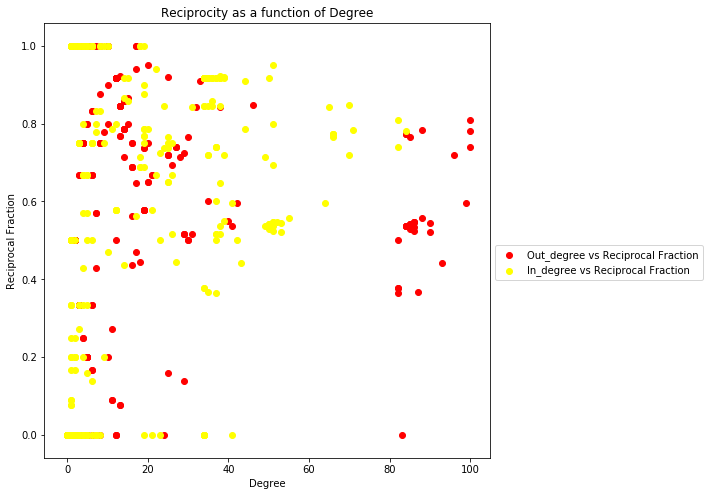

In [15]:
# this data set is from Gorochowski et al., Science Advances 4(3), eaap9751 (2018) 
# https://advances.sciencemag.org/content/4/3/eaap9751
fname = 'metabolism_afulgidus.gml'
print(f'reading the network file : {fname}\n')
##### do not modify above here #####

meta = nx.Graph()
meta = nx.read_gml(fname, label = 'id')

#Lists to hold all calulcated values
in_deg = []
out_deg = []
reachable = []
eccentricity = []
reciprocal_frac = []

for n in meta.nodes():
    #in degrees
    in_deg.append(meta.in_degree(n))
    #out degrees
    out_deg.append(meta.out_degree(n))
    
    #for each node calculate the shortest path to all possible nodes and then take the len
    #this gives you the number of nodes it can reach
    ssspl = nx.single_source_shortest_path_length(meta,n)
    reachable.append(len(ssspl))
    #Need length to every node so just using the list previous calculated and storing the max value
    length_to_all_nodes = [i for i in ssspl.values()]
    eccentricity.append(max(length_to_all_nodes))
    
    #finding all reciprocal edges checking all nodes and their neighbors to if (i,j) exists and (j,i)
    #Used formula (# of recip)/(Total out degree)
    degree = meta.out_degree(n)
    if(degree > 0):
        recip_count = 0
        for neigh in meta.neighbors(n):
            if(meta.has_edge(n, neigh) and meta.has_edge(neigh, n)):
                recip_count+=1
        reciprocal_frac.append(recip_count/degree)
    else:
        reciprocal_frac.append(0)

plt.figure(figsize=(8,8))
plt.scatter(out_deg, in_deg, marker = '*')
plt.xlabel("Out-Degree")
plt.ylabel("In-Degree")
plt.title("In-Degree as a function of Out-Degree")
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(out_deg, reachable, color = 'red', label = "Out_degree vs Reachable")
plt.scatter(in_deg, reachable, color = 'yellow', label = "In_degree vs Reachable")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Degree")
plt.ylabel("Reachable Nodes")
plt.title("Reachable Nodes as a function of Degree")
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(out_deg, eccentricity, color = 'red', label = "Out_degree vs Eccentricity")
plt.scatter(in_deg, eccentricity, color = 'yellow', label = "In_degree vs Eccentricity")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Degree")
plt.ylabel("Eccentricity")
plt.title("Eccentricity as a function of Degree")
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(out_deg, reciprocal_frac, color = 'red', label = "Out_degree vs Reciprocal Fraction")
plt.scatter(in_deg, reciprocal_frac, color = 'yellow', label = "In_degree vs Reciprocal Fraction")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Degree")
plt.ylabel("Reciprocal Fraction")
plt.title("Reciprocity as a function of Degree")
plt.show()

**In degree vs Out degree** <br>
There is a loose trend shown in the graph that low out-degree nodes will have low in-degrees and that high out-degree nodes tend to have high in-degrees. This makes sense as this metabolism network has important nodes that need to pass information also need to be fed information and regulations. <br>
<br>
**Reachable nodes as a function of degree**<br>
There is no correlation between reachable nodes from a source node v and the degree of the same node v. This is because if a node *s* has a degree of 1, but it connected to a heavily connected component that node *s* will have a large number of reachable nodes while still having a small degree. It is also true that a node with a high-degree does not necessarily have a high reachability. Reachable nodes are not dependent on the degree, but the components and their individual connectedness. <br>
<br>
**Eccentricity as a function of degree**<br>
Higher degree nodes seem to have a more middle-ground/average eccentricity as a node with a higher degree has more possible paths stemming from itself. A node with a low degree will have less options for paths to every node making it harder to have an average/lower eccentricity and that is shown on the graph above where low degree nodes have a wide range of eccentricities. <br>
<br>
**Reciprocal Fraction as a function of degree**<br>
The reicprocal fraction as function of degree has no correlation because one nodes degree does not indicate anything about the edges that come from a different node. 

***
***

## Problem 5 : Reading the literature (*10 pts extra credit*)

Choose a paper from the [Supplemental Reading list on the external course webpage](http://tuvalu.santafe.edu/~aaronc/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

* *What was the research question?*<br/>
This paper demonstrates a new way of calculating assortivity and disassortivity in a "node-centric" method. The likelihood that a node has an edge with a node with similar to not similar characteris is assortivity and disassortivity. 
<br/>

* *What was the approach the authors took to answer that question?*<br/>
These researchers took the community standard calculation of dis-/assortivity, which was a global coefficient, and through local neighbors of nodes were able to produce equations for node-centric, local, dis-/assortivity numbers.
<br/>

* *What did they do well?*<br/>
Their research paper had two sections that helped us understand the formation of their equations and the application to real-world networks. This allowed the reader to, first, make sure they understood the equations that will be used, and, second, apply those equations and understanding.
<br/>

* *What could they have done better?*<br/>
I think they could have addressed the nay-sayers that would have issues for their new calculation. In the discussion section I would have like to see responses to issues/questions put forward for their new calculations.
<br/>

* *What extensions can you envision?*<br/>
I see usefulness coming from this for epidimiology. As AI wants to make predictions on the spread of communicable diseases knowing local assortivity scores for cities or even people will allow it to better predict the next steps.